<a href="https://colab.research.google.com/github/PSG4160/6can-do-it/blob/chad/2CH_6%EC%A1%B0_%EC%84%A0%ED%83%9D%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install nltk textblob gensim

In [ ]:
import pandas as pd
import nltk
from textblob import TextBlob
import re

# NLTK 리소스 다운로드 (필요할 경우)
nltk.download('punkt')

# 데이터 읽기 (인코딩 방식 변경)
df = pd.read_csv("netflix_reviews.csv", encoding='latin1', on_bad_lines='skip', low_memory=False)

# 텍스트 전처리 함수
def preprocess_text(text):
    if isinstance(text, float):
        return ""
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.strip()
    return text

# 리뷰 컬럼 전처리
df['content_c'] = df['content'].apply(preprocess_text)

# 감성 분석 함수
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# 감성 분석 적용
df['sentiment'] = df['content_c'].apply(get_sentiment)

# 감성 라벨링
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'positive' if x > 0.1 else ('negative' if x < -0.1 else 'neutral'))

# 결과 출력
result = df[['content_c', 'score', 'sentiment_label']]
print(result.head())  # 데이터의 일부를 출력


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                           content_c score sentiment_label
0  great app on the move  i can watch my movies a...     5        positive
1                                               good     5        positive
2  need to improve and to update some error durin...     3         neutral
3  netflix is a nice appbut not all the movies ar...     3         neutral
4  not much availability considering options on w...     3         neutral


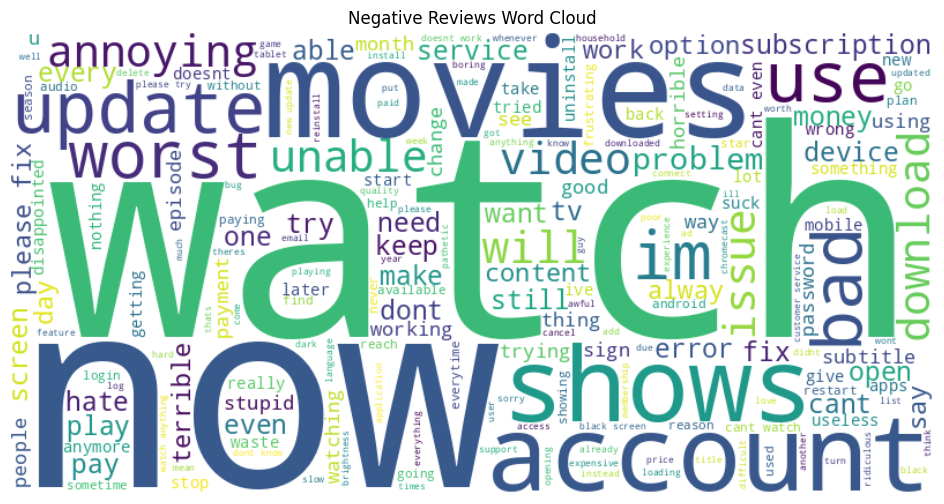

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# 불용어 설정
stopwords = set(STOPWORDS)
stopwords.update(['netflix', 'movie', 'show', 'time', 'app', 'series', 'phone'])

# 부정적인 리뷰만 필터링
negative_reviews = ' '.join(df[df['sentiment_label'] == 'negative']['content_c'])

# 워드클라우드 생성
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(negative_reviews)

# 워드클라우드 시각화
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews Word Cloud')
plt.show()
